<a href="https://colab.research.google.com/github/IvanSolanes/Test_Rappi/blob/main/Rappi_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from matplotlib import pyplot as plt
from funciones_utiles import *

%matplotlib inline

#Data

In [ ]:
%%time
url = "https://bitbucket.org/fernandopaulin/rpmx_ds_challenge/raw/9c6f6f0dd29e7d8a1a720590f2190ffaf47a4790/ds_challenge_apr2021.csv"
df = pd.read_csv(url)
display(df.head())

,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,0,F,608.345634,2020-01-21,20,"{'model': 2020, 'device_score': 3, 'os': 'ANDR...",Super,Merida,Física,71000,51,Aceptada,False,60.834563,5.475111,False
1,0,F,88.719243,2020-01-15,7,"{'model': 2020, 'device_score': 1, 'os': 'ANDR...",NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False
2,1,F,790.037653,2020-01-17,11,"{'model': 2020, 'device_score': 1, 'os': '.'}",NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False
3,1,F,767.005387,2020-01-05,11,"{'model': 2020, 'device_score': 3, 'os': 'WEB'}",MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,7.670054,False
4,1,F,254.171053,2020-01-30,10,"{'model': 2020, 'device_score': 3, 'os': '%%'}",NaN,Guadalajara,Física,94000,56,Aceptada,False,0.000000,2.541711,False


CPU times: user 90.5 ms, sys: 19.9 ms, total: 110 ms
Wall time: 1.18 s


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26975 entries, 0 to 26974
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_USER          26975 non-null  int64  
 1   genero           26975 non-null  object 
 2   monto            26975 non-null  float64
 3   fecha            26975 non-null  object 
 4   hora             26975 non-null  int64  
 5   dispositivo      26975 non-null  object 
 6   establecimiento  16856 non-null  object 
 7   ciudad           15297 non-null  object 
 8   tipo_tc          26975 non-null  object 
 9   linea_tc         26975 non-null  int64  
 10  interes_tc       26975 non-null  int64  
 11  status_txn       26975 non-null  object 
 12  is_prime         26975 non-null  bool   
 13  dcto             26975 non-null  float64
 14  cashback         26975 non-null  float64
 15  fraude           26975 non-null  bool   
dtypes: bool(2), float64(3), int64(4), object(7)
memory usage: 

In [ ]:
null_columns = df.columns[df.isnull().any()]
print("Number of columns with missing values: ", len(null_columns))
df[null_columns].isnull().sum()

Number of columns with missing values:  2


establecimiento    10119
ciudad             11678
dtype: int64

In [ ]:
'''
Porcentaje de missing values de las columnas
'''
df.isnull().sum() * 100 / len(df)

ID_USER             0.000000
genero              0.000000
monto               0.000000
fecha               0.000000
hora                0.000000
dispositivo         0.000000
establecimiento    37.512512
ciudad             43.291937
tipo_tc             0.000000
linea_tc            0.000000
interes_tc          0.000000
status_txn          0.000000
is_prime            0.000000
dcto                0.000000
cashback            0.000000
fraude              0.000000
dtype: float64

In [ ]:
print("Number of duplicated rows: ", df[df.duplicated()].shape[0])
df[df.duplicated()]

Number of duplicated rows:  0


,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude


In [ ]:
print("Number of observations with monto less than 0 :", df.loc[df.monto<0].shape[0])
df.loc[df.monto<0]

Number of observations with monto less than 0 : 0


,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude


# Exploratory Data Analysis

In [ ]:
df_1 = df.copy()
df_1['OS'] = df_1['dispositivo'].apply(lambda x: json.loads(x.replace("'", '"'))['os'])
df_1['DEVICE_SCORE'] = df_1['dispositivo'].apply(lambda x: json.loads(x.replace("'", '"'))['device_score'])

In [ ]:
df1 = pd.concat([df.fraude.value_counts(), df.fraude.value_counts(normalize=True)], axis=1)
df1.columns = ["Total", "Relative"]
df1['Relative'] = df1['Relative'].apply(lambda x: "{0:.2f}%".format(x*100))
df1

,Total,Relative
False,26165,97.00%
True,810,3.00%


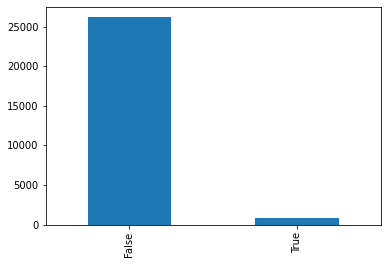

In [ ]:
df.fraude.value_counts().plot(kind='bar')
plt.show()

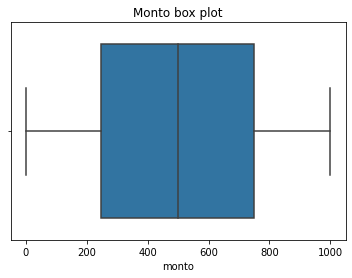

In [ ]:
"""
Boxplot de los montos
"""
sns.boxplot(x=df['monto'])
plt.title("Monto box plot")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


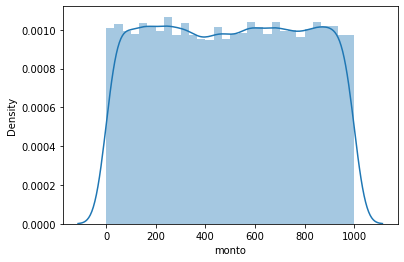

In [ ]:
"""
Distribución de los montos
"""
sns.distplot(df_1.monto)
plt.show()

In [ ]:
"""

"""
df.fraude.groupby(df.status_txn).value_counts(sort=True)

status_txn  fraude
Aceptada    False     18274
            True        570
En proceso  False      5179
            True        162
Rechazada   False      2712
            True         78
Name: fraude, dtype: int64

In [ ]:
df.fraude.groupby(df.tipo_tc).value_counts(sort=True)

tipo_tc  fraude
Física   False     18324
         True        579
Virtual  False      7841
         True        231
Name: fraude, dtype: int64

In [ ]:
print("Numero de fraudes donde no hay registro de ciudad: ", df.loc[df.ciudad.isnull(), ['fraude']].sum()[0])

Numero de fraudes donde no hay registro de ciudad:  354


In [ ]:
print("Numero de fraudes donde no hay registro de establecimiento: ", df.loc[df.establecimiento.isnull(), ['fraude']].sum()[0])

Numero de fraudes donde no hay registro de establecimiento:  317


In [ ]:
"""
Revisamos a detalle la columna de dispositivos, el numero de modelos que hay y cuantos registros tenemos por dispositivo. Vemos que no hay mucha diferencia de registros
"""
print("Hay",df.dispositivo.nunique(),"canáles únicos")
df.dispositivo.value_counts()

Hay 20 canáles únicos


{'model': 2020, 'device_score': 4, 'os': '%%'}         1411
{'model': 2020, 'device_score': 1, 'os': 'WEB'}        1388
{'model': 2020, 'device_score': 5, 'os': 'WEB'}        1377
{'model': 2020, 'device_score': 2, 'os': '.'}          1374
{'model': 2020, 'device_score': 5, 'os': 'ANDROID'}    1372
{'model': 2020, 'device_score': 2, 'os': '%%'}         1370
{'model': 2020, 'device_score': 2, 'os': 'WEB'}        1358
{'model': 2020, 'device_score': 1, 'os': '%%'}         1355
{'model': 2020, 'device_score': 3, 'os': '.'}          1355
{'model': 2020, 'device_score': 4, 'os': 'WEB'}        1354
{'model': 2020, 'device_score': 5, 'os': '%%'}         1348
{'model': 2020, 'device_score': 1, 'os': 'ANDROID'}    1344
{'model': 2020, 'device_score': 4, 'os': 'ANDROID'}    1335
{'model': 2020, 'device_score': 4, 'os': '.'}          1335
{'model': 2020, 'device_score': 5, 'os': '.'}          1334
{'model': 2020, 'device_score': 3, 'os': '%%'}         1324
{'model': 2020, 'device_score': 3, 'os':

In [ ]:
"""
Siguiendo con el análisis por dispositivo, podemos ver que en todos los modelos/canales tiene similar número de fraudes y no fraudes (poca varianza)
"""
df.fraude.groupby(df.dispositivo).value_counts(sort=True)

dispositivo                                          fraude
{'model': 2020, 'device_score': 1, 'os': '%%'}       False     1315
                                                     True        40
{'model': 2020, 'device_score': 1, 'os': '.'}        False     1281
                                                     True        36
{'model': 2020, 'device_score': 1, 'os': 'ANDROID'}  False     1295
                                                     True        49
{'model': 2020, 'device_score': 1, 'os': 'WEB'}      False     1356
                                                     True        32
{'model': 2020, 'device_score': 2, 'os': '%%'}       False     1331
                                                     True        39
{'model': 2020, 'device_score': 2, 'os': '.'}        False     1337
                                                     True        37
{'model': 2020, 'device_score': 2, 'os': 'ANDROID'}  False     1275
                                                     Tru

In [ ]:
"""
Agrupamos por device score para ver si podemos obtener algún score con mayor número de fraudes.
"""
df_1.fraude.groupby(df_1.DEVICE_SCORE).value_counts(sort=True)

DEVICE_SCORE  fraude
1             False     5247
              True       157
2             False     5264
              True       155
3             False     5122
              True       164
4             False     5252
              True       183
5             False     5280
              True       151
Name: fraude, dtype: int64

In [ ]:
print("Promedio del monto de las trnasacciones que son fraude:",df_1.loc[df_1.fraude==True, "monto"].mean())
print("Promedio del monto de las trnasacciones:",df_1.loc[:, "monto"].mean())

Promedio del monto de las trnasacciones que son fraude: 492.0996666305165
Promedio del monto de las trnasacciones: 499.06949259702935


In [ ]:
"""
De la misma forma, agrupamos por OS  para ver si podemos obtener sistema operativo  con mayor número de fraudes.
"""
df_1.fraude.groupby(df_1.OS).value_counts(sort=True)

OS       fraude
%%       False     6595
         True       213
.        False     6523
         True       192
ANDROID  False     6470
         True       216
WEB      False     6577
         True       189
Name: fraude, dtype: int64

In [ ]:
# La hora a la que más hemos tenido fraudes son las 7 de la mañana, 10pm y 11pm, aunque a las 7 y 10pm son las horas con muchas transacciones.
df_1.hora.groupby(df_1.fraude).value_counts(sort=True)

fraude  hora
False   7       1179
        5       1178
        6       1172
        18      1171
        21      1171
        15      1166
        22      1166
        10      1165
        19      1160
        1       1158
        16      1154
        4       1144
        3       1133
        2       1131
        14      1129
        11      1126
        17      1114
        8       1113
        12      1109
        13      1084
        20      1084
        23      1084
        9       1074
True    7         48
        22        45
        23        45
        19        44
        14        41
        15        41
        10        37
        18        37
        11        36
        17        36
        9         35
        20        34
        8         33
        16        33
        1         32
        4         32
        2         31
        3         30
        6         30
        12        28
        21        28
        5         27
        13        27
Name: hora, dtype: in

In [ ]:
df.fraude.groupby(df.ciudad).value_counts(sort=True)

ciudad       fraude
Guadalajara  False     3715
             True       118
Merida       False     3641
             True       120
Monterrey    False     3606
             True       100
Toluca       False     3879
             True       118
Name: fraude, dtype: int64

In [ ]:
df.genero.groupby(df.fraude).value_counts(sort=True)

fraude  genero
False   M         13131
        F         10392
        --         2642
True    M           388
        F           334
        --           88
Name: genero, dtype: int64

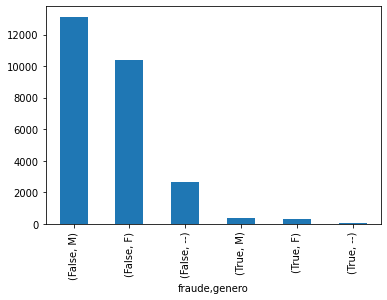

In [ ]:
display(df.genero.groupby(df.fraude).value_counts(sort=True).plot.bar())
plt.show()

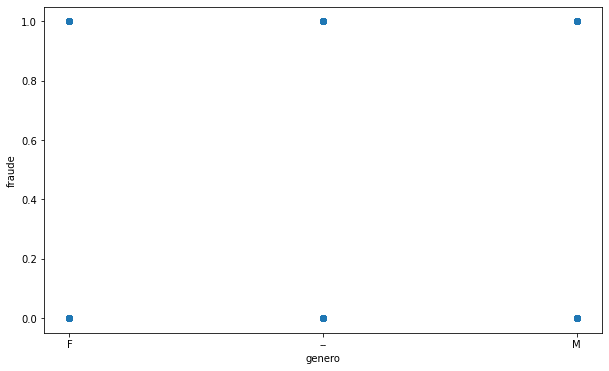

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['genero'], df['fraude'])
ax.set_xlabel('genero')
ax.set_ylabel('fraude')
plt.show()

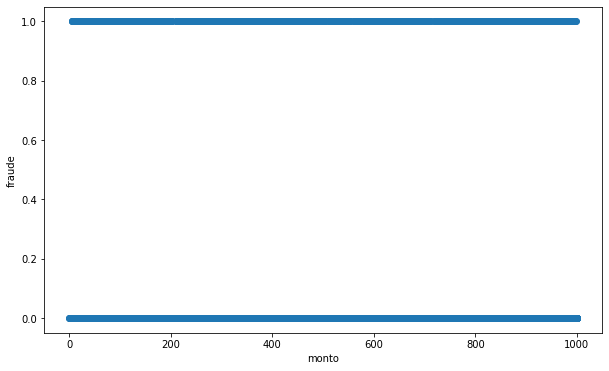

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['monto'], df['fraude'])
ax.set_xlabel('monto')
ax.set_ylabel('fraude')
plt.show()

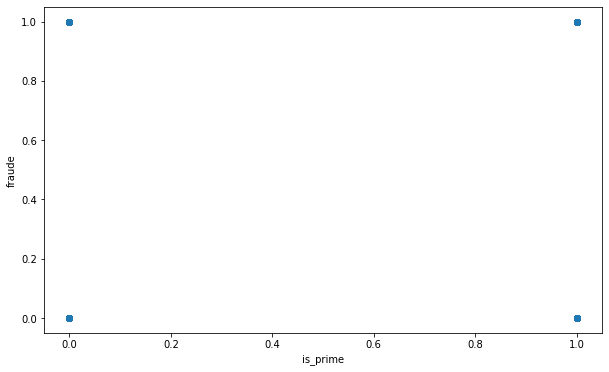

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['is_prime'], df['fraude'])
ax.set_xlabel('is_prime')
ax.set_ylabel('fraude')
plt.show()

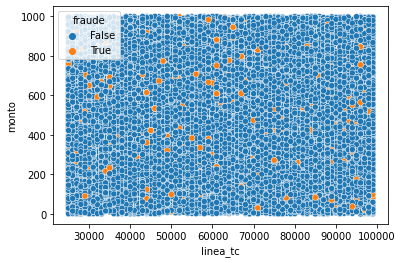

In [ ]:
sns.scatterplot(data=df, x="linea_tc", y="monto", hue='fraude')
ax.set_xlabel('linea_tc')
ax.set_ylabel('monto')
plt.show()

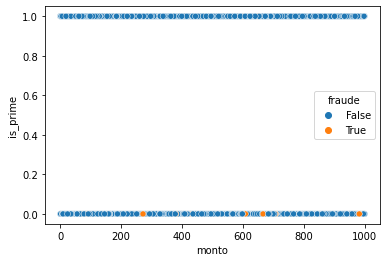

In [ ]:
sns.scatterplot(data=df, x="monto", y="is_prime", hue='fraude')
ax.set_xlabel('linea_tc')
ax.set_ylabel('monto')
plt.show()

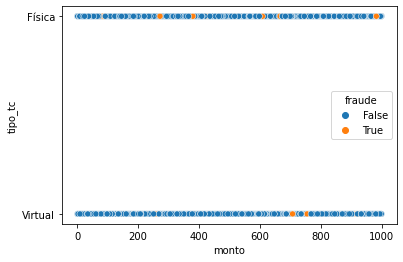

In [ ]:
sns.scatterplot(data=df, x="monto", y="tipo_tc", hue='fraude')
ax.set_xlabel('linea_tc')
ax.set_ylabel('monto')
plt.show()

In [ ]:
df[["monto", "linea_tc",	"interes_tc",	"dcto",	"cashback"]].describe()

,monto,linea_tc,interes_tc,dcto,cashback
count,26975.000000,26975.000000,26975.000000,26975.000000,26975.000000
mean,499.069493,62476.811863,48.224875,17.466134,6.261186
std,289.309518,21886.892902,9.587256,34.334566,4.458440
min,0.017303,25000.000000,32.000000,0.000000,0.000138
25%,246.521227,44000.000000,40.000000,0.000000,2.791740
50%,500.501022,62000.000000,48.000000,0.000000,5.636711
75%,749.598192,82000.000000,57.000000,18.770710,8.531604
max,999.917764,99000.000000,64.000000,199.356251,19.991582


,monto,linea_tc,interes_tc,dcto,cashback
monto,1.000000,-0.008415,0.014449,0.286717,0.814530
linea_tc,-0.008415,1.000000,-0.039932,0.002777,-0.003100
interes_tc,0.014449,-0.039932,1.000000,0.003984,0.012961
dcto,0.286717,0.002777,0.003984,1.000000,0.147308
cashback,0.814530,-0.003100,0.012961,0.147308,1.000000


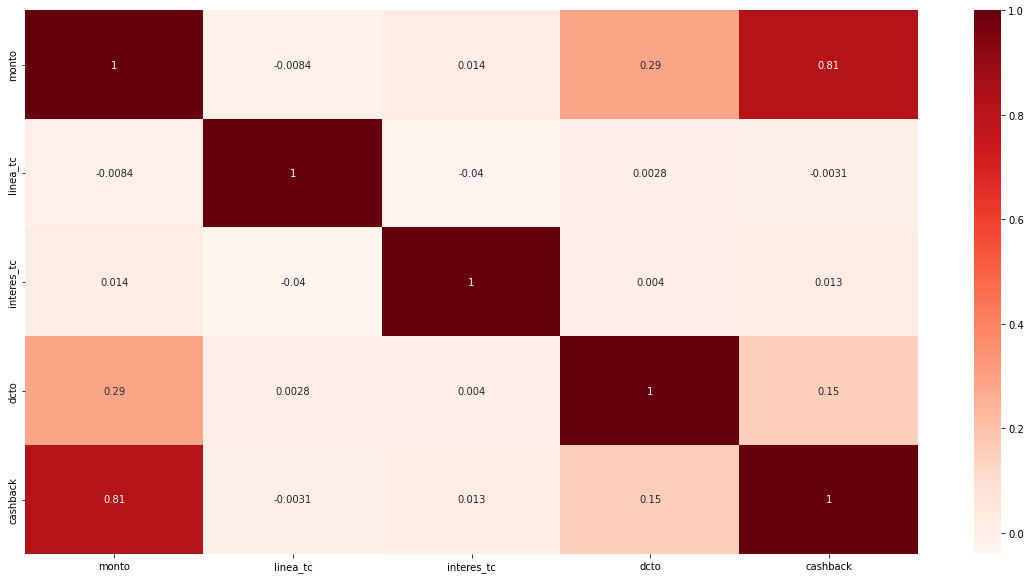

In [ ]:
plt.figure(figsize=(20,10))
c= df[["monto", "linea_tc",	"interes_tc",	"dcto",	"cashback"]].corr()
sns.heatmap(c,cmap='Reds',annot=True)
display(c)
plt.show()

In [ ]:
#Grouping by month (solamente tenemos un mes)
df_2 = df.copy()
df_2.fecha = pd.DatetimeIndex(df_2.fecha)
df_2.set_index("fecha").groupby([pd.Grouper(freq="M"), "fraude"]).sum().reset_index()

,fecha,fraude,ID_USER,monto,hora,linea_tc,interes_tc,is_prime,dcto,cashback
0,2020-01-31,False,52486410,1.306380e+07,313247,1634755000,1261942,3459,457117.529909,163912.941037
1,2020-01-31,True,1565162,3.986007e+05,10119,50557000,38924,100,14031.439092,4982.540899


#Modeling

In [ ]:
# !pip install --upgrade scikit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report, confusion_matrix, accuracy_score

In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
class ColumnSelectTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        return X[self.columns]

## Split Data

In [ ]:
all_features = ["genero", "monto", "tipo_tc", "linea_tc", "interes_tc", "status_txn", "is_prime", "dcto", "cashback", "OS", "DEVICE_SCORE"]
num_features = ["monto", "linea_tc", "interes_tc", "dcto", "cashback"]
cat_features = ["genero", "tipo_tc","status_txn", "is_prime", "OS", "DEVICE_SCORE"]
target = ["fraude"]

print("Usaremos ",len(all_features), "columnas totales, de las que ",len(num_features),"son numéricos y ",len(cat_features),"son categoricos")

assert len(all_features) == len(num_features)+len(cat_features)

Usaremos  11 columnas totales, de las que  5 son numéricos y  6 son categoricos


In [ ]:
X = df_1[all_features]
y = df_1[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [ ]:
print("Observations on train", X_train.shape)
print("Observations on test", X_test.shape)

Observations on train (18882, 11)
Observations on test (8093, 11)


## Feature Selection

### Varianza

In [ ]:
from sklearn.feature_selection import VarianceThreshold, f_classif, SelectKBest

In [ ]:
numeric = df_1[num_features]
sel = VarianceThreshold(threshold=0.01)
sel.fit(numeric/numeric.mean())
print(numeric.var())

monto         8.370000e+04
linea_tc      4.790361e+08
interes_tc    9.191547e+01
dcto          1.178862e+03
cashback      1.987769e+01
dtype: float64


In [ ]:
'''
No quitó ninguna columna por poca varianza con respecto a la media (coeficiente de variación)
'''
mask = sel.get_support()
reduced_df = numeric.loc[:,mask]
reduced_df.head()

,monto,linea_tc,interes_tc,dcto,cashback
0,608.345634,71000,51,60.834563,5.475111
1,88.719243,71000,51,0.000000,1.774385
2,790.037653,94000,56,0.000000,15.800753
3,767.005387,94000,56,0.000000,7.670054
4,254.171053,94000,56,0.000000,2.541711


### Correlación

In [ ]:
corr_df=X.corr().abs()
mask=np.triu(np.ones_like(corr_df,dtype=bool))
tri_df=corr_df.mask(mask)

In [ ]:
'''
No quitó ninguna columna por correlación
'''
to_drop=[c for c in tri_df.columns if any (tri_df[c]>0.85)]
reduced_df=X.drop(to_drop, axis=1)
print(reduced_df.shape)
reduced_df.head(2)

(26975, 11)


,genero,monto,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,OS,DEVICE_SCORE
0,F,608.345634,Física,71000,51,Aceptada,False,60.834563,5.475111,ANDROID,3
1,F,88.719243,Virtual,71000,51,Aceptada,False,0.000000,1.774385,ANDROID,1


### By Model

####(F statistic)

In [ ]:
scaler = StandardScaler()
X_train_num_scale = scaler.fit_transform(X_train[num_features])

In [ ]:
encoder = OneHotEncoder(sparse=False)
X_train_cat_enco = encoder.fit_transform(X_train[cat_features])

In [ ]:
'''X_train_num_scale.get_feature_names_out()
array(['monto', 'linea_tc', 'interes_tc', 'dcto', 'cashback'],
      dtype=object)'''

"X_train_num_scale.get_feature_names_out()\narray(['monto', 'linea_tc', 'interes_tc', 'dcto', 'cashback'],\n      dtype=object)"

In [ ]:
'''X_train_cat_enco.get_feature_names_out()
array(['genero_--', 'genero_F', 'genero_M', 'tipo_tc_Física',
       'tipo_tc_Virtual', 'status_txn_Aceptada', 'status_txn_En proceso',
       'status_txn_Rechazada', 'is_prime_False', 'is_prime_True', 'OS_%%',
       'OS_.', 'OS_ANDROID', 'OS_WEB', 'DEVICE_SCORE_1', 'DEVICE_SCORE_2',
       'DEVICE_SCORE_3', 'DEVICE_SCORE_4', 'DEVICE_SCORE_5'], dtype=object)'''

"X_train_cat_enco.get_feature_names_out()\narray(['genero_--', 'genero_F', 'genero_M', 'tipo_tc_Física',\n       'tipo_tc_Virtual', 'status_txn_Aceptada', 'status_txn_En proceso',\n       'status_txn_Rechazada', 'is_prime_False', 'is_prime_True', 'OS_%%',\n       'OS_.', 'OS_ANDROID', 'OS_WEB', 'DEVICE_SCORE_1', 'DEVICE_SCORE_2',\n       'DEVICE_SCORE_3', 'DEVICE_SCORE_4', 'DEVICE_SCORE_5'], dtype=object)"

In [ ]:
processed_data = np.concatenate([X_train_num_scale, X_train_cat_enco], axis=1)
processed_data.shape

(18882, 24)

In [ ]:
selector = SelectKBest(f_classif, k=19)
columns_selected_fit = selector.fit(processed_data, y_train)
columns_selected = columns_selected_fit.transform(processed_data)
columns_selected.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(18882, 19)

In [ ]:
selected_cols = columns_selected_fit.get_feature_names_out()
selected_cols_i = [int(num.replace("x", "")) for num in selected_cols]
selected_cols_i

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 17, 18, 19, 20, 22, 23]

In [ ]:
columnas_totales = ['monto', 'linea_tc', 'interes_tc', 'dcto', 'cashback', 'genero_--', 'genero_F', 'genero_M', 'tipo_tc_Física', 'tipo_tc_Virtual', 
 'status_txn_Aceptada', 'status_txn_En proceso', 'status_txn_Rechazada', 'is_prime_False', 'is_prime_True', 'OS_%%', 'OS_.', 
 'OS_ANDROID', 'OS_WEB', 'DEVICE_SCORE_1', 'DEVICE_SCORE_2', 'DEVICE_SCORE_3', 'DEVICE_SCORE_4', 'DEVICE_SCORE_5']

In [ ]:
selected_cols_model = [col for j,col in enumerate(columnas_totales) if j in selected_cols_i]
selected_cols_model

['monto',
 'interes_tc',
 'dcto',
 'cashback',
 'genero_--',
 'genero_F',
 'genero_M',
 'tipo_tc_Física',
 'tipo_tc_Virtual',
 'status_txn_Aceptada',
 'status_txn_En proceso',
 'OS_%%',
 'OS_.',
 'OS_ANDROID',
 'OS_WEB',
 'DEVICE_SCORE_1',
 'DEVICE_SCORE_2',
 'DEVICE_SCORE_4',
 'DEVICE_SCORE_5']

#### Model Contribution

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lcv = LassoCV()
lcv.fit(processed_data, y_train)
lcv_mask = lcv.coef_ !=0
print(sum(lcv_mask))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1572: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2


In [ ]:
[i for (i, v) in zip(columnas_totales, lcv_mask) if v]

['monto', 'DEVICE_SCORE_4']

## Models

In [ ]:
# num_features = ["monto", "linea_tc", "interes_tc", "dcto", "cashback"]
# cat_features = ["genero", "tipo_tc","status_txn", "is_prime", "OS", "DEVICE_SCORE"]

num_features = ["monto", "linea_tc", "interes_tc", "dcto"]
cat_features = ["genero", "tipo_tc","status_txn", "is_prime", "OS", "DEVICE_SCORE"]

In [ ]:
numeric_features = Pipeline([
    ('cst', ColumnSelectTransformer(num_features)),
    ('scaler', StandardScaler())
])

In [ ]:
categorical_features = Pipeline([
    ('selector', ColumnSelectTransformer(cat_features)),
    ('encoder', OneHotEncoder(sparse=False)),
])

In [ ]:
features = FeatureUnion([
    ('numeric', numeric_features),
    ('categorical', categorical_features)
])

In [ ]:
def Modelo_Score(model, x_data_train, y_data_train, x_data_test, y_data_test):
  model_pipe = Pipeline([
      ('features', features),
      ('classifier', model)
  ])

  model_pipe.fit(x_data_train, y_data_train)
  y_hat_test = model_pipe.predict(x_data_test)
  print("Accuracy score for test set is: ",accuracy_score(y_data_test, y_hat_test))
  print("Recall score for test set is: ",recall_score(y_data_test, y_hat_test))
  print("F1 score for test set is: ",f1_score(y_data_test, y_hat_test))
  print("----"*20)
  print("Confusion Matrix for test set \n",confusion_matrix(y_data_test, y_hat_test))

### Models with imbalance data

#### Base Model (Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf1 = LogisticRegression(C=10)
Modelo_Score(clf1, X_train, y_train, X_test, y_test)

Accuracy score for test set is:  0.9699740516495737
Recall score for test set is:  0.0
F1 score for test set is:  0.0
--------------------------------------------------------------------------------
Confusion Matrix for test set 
 [[7850    0]
 [ 243    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf2 = DecisionTreeClassifier(max_depth=10)

Modelo_Score(clf2, X_train, y_train, X_test, y_test)

Accuracy score for test set is:  0.9642901272704807
Recall score for test set is:  0.00823045267489712
F1 score for test set is:  0.013651877133105804
--------------------------------------------------------------------------------
Confusion Matrix for test set 
 [[7802   48]
 [ 241    2]]


#### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf3 = RandomForestClassifier(max_depth=5)

Modelo_Score(clf3, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Accuracy score for test set is:  0.9699740516495737
Recall score for test set is:  0.0
F1 score for test set is:  0.0
--------------------------------------------------------------------------------
Confusion Matrix for test set 
 [[7850    0]
 [ 243    0]]


#### Anomaly Detection

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
clf4 = IsolationForest(n_estimators=100, contamination=0.05)

model_pipe4 = Pipeline([
    ('features', features),
    ('classifier', clf4)
])

model_pipe4.fit(X_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numeric',
                                                 Pipeline(steps=[('cst',
                                                                  ColumnSelectTransformer(columns=['monto',
                                                                                                   'linea_tc',
                                                                                                   'interes_tc',
                                                                                                   'dcto'])),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('categorical',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelectTransformer(columns=['genero',
                                                                                                   'tipo_tc',
                                                                                                   'status_txn',
                                                                                                   'is_prime',
                                                                                                   'OS',
                                                                                                   'DEVICE_SCORE'])),
                                                                 ('encoder',
                                                                  OneHotEncoder(sparse=False))]))])),
                ('classifier', IsolationForest(contamination=0.05))])

In [ ]:
y_hat_test = model_pipe4.predict(X_test)
y_hat_test = np.where(y_hat_test == -1, 0, y_hat_test)

print("The accuracy score for train set is: ",accuracy_score(y_test, y_hat_test))
print("The precision score for train set is: ",recall_score(y_test, y_hat_test))
print("The F1 score for train set is: ",f1_score(y_test, y_hat_test))
print("----"*20)
print("The confusion Matrix for train set \n",confusion_matrix(y_test, y_hat_test))

The accuracy score for train set is:  0.07574447053008773
The precision score for train set is:  0.9300411522633745
The F1 score for train set is:  0.05698436712052446
--------------------------------------------------------------------------------
The confusion Matrix for train set 
 [[ 387 7463]
 [  17  226]]


### Addressing Imbalance using Class Weights

#### Logistic Regression

In [ ]:
clf1_CW = LogisticRegression(C=1, class_weight='balanced')

Modelo_Score(clf1_CW, X_train, y_train, X_test, y_test)

Accuracy score for test set is:  0.544050413937971
Recall score for test set is:  0.4567901234567901
F1 score for test set is:  0.05674846625766871
--------------------------------------------------------------------------------
Confusion Matrix for test set 
 [[4292 3558]
 [ 132  111]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Decision Tree

In [ ]:
clf2_CW = DecisionTreeClassifier(max_depth=15, class_weight='balanced')

Modelo_Score(clf2_CW, X_train, y_train, X_test, y_test)

Accuracy score for test set is:  0.6201655751884344
Recall score for test set is:  0.3497942386831276
F1 score for test set is:  0.05240443896424168
--------------------------------------------------------------------------------
Confusion Matrix for test set 
 [[4934 2916]
 [ 158   85]]


#### RandomForest

In [ ]:
clf3_CW = RandomForestClassifier(max_depth=5, class_weight='balanced')

Modelo_Score(clf3_CW, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Accuracy score for test set is:  0.7985913752625726
Recall score for test set is:  0.20164609053497942
F1 score for test set is:  0.056712962962962965
--------------------------------------------------------------------------------
Confusion Matrix for test set 
 [[6414 1436]
 [ 194   49]]


### Models with Balanced Data (Random Over Sampling)

In [ ]:
# class count
class_count_0, class_count_1 = df_1['fraude'].value_counts()

# Separate class
class_0 = df_1[df_1['fraude'] == 0]
class_1 = df_1[df_1['fraude'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (26165, 18)
class 1: (810, 18)


total class of 1 and 0: True     26165
False    26165
Name: fraude, dtype: int64


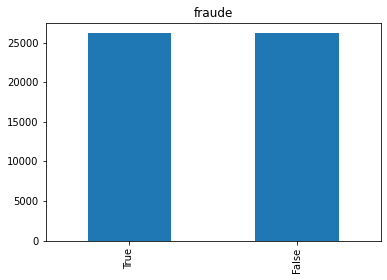

In [ ]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_over['fraude'].value_counts())# plot the count after under-sampeling
test_over['fraude'].value_counts().plot(kind='bar', title='fraude')
plt.show()

In [ ]:
X_over = test_over[all_features]
y_over = test_over[target]

In [ ]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.30, random_state=42, stratify=y_over)
print("Observations on train", X_train_over.shape)
print("Observations on test", X_test_over.shape)

Observations on train (36631, 11)
Observations on test (15699, 11)


#### Logistic Regresion

In [ ]:
clf1_over = LogisticRegression(C=10)

Modelo_Score(clf1_over, X_train_over, y_train_over, X_test_over, y_test_over)

Accuracy score for test set is:  0.536339894260781
Recall score for test set is:  0.5458020129952861
F1 score for test set is:  0.5406701583896004
--------------------------------------------------------------------------------
Confusion Matrix for test set 
 [[4136 3714]
 [3565 4284]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Decision Tree

In [ ]:
clf2_over = DecisionTreeClassifier(max_depth=10)

Modelo_Score(clf2_over, X_train_over, y_train_over, X_test_over, y_test_over)

Accuracy score for test set is:  0.5228995477418944
Recall score for test set is:  0.539686584278252
F1 score for test set is:  0.530760556321263
--------------------------------------------------------------------------------
Confusion Matrix for test set 
 [[3973 3877]
 [3613 4236]]


#### RandomForest

In [ ]:
clf3_over = RandomForestClassifier(max_depth=5)

Modelo_Score(clf3_over, X_train_over, y_train_over, X_test_over, y_test_over)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Accuracy score for test set is:  0.6568571246576215
Recall score for test set is:  0.687985730666327
F1 score for test set is:  0.6672020757397913
--------------------------------------------------------------------------------
Confusion Matrix for test set 
 [[4912 2938]
 [2449 5400]]


### Feature Importance

In [ ]:
# pip install shap

In [ ]:
columnas_totales = ['monto', 'linea_tc', 'interes_tc', 'dcto', 'genero_--', 'genero_F', 'genero_M', 'tipo_tc_Física', 'tipo_tc_Virtual', 
 'status_txn_Aceptada', 'status_txn_En proceso', 'status_txn_Rechazada', 'is_prime_False', 'is_prime_True', 'OS_%%', 'OS_.', 
 'OS_ANDROID', 'OS_WEB', 'DEVICE_SCORE_1', 'DEVICE_SCORE_2', 'DEVICE_SCORE_3', 'DEVICE_SCORE_4', 'DEVICE_SCORE_5']

In [ ]:
clf3_over = RandomForestClassifier(max_depth=5)

final_model_pipe = Pipeline([
    ('features', features),
    ('classifier', clf3_over)
])

final_model_pipe.fit(X_train_over, y_train_over)
y_hat_test = final_model_pipe.predict(X_test_over)
print("Accuracy score for test set is: ",accuracy_score(y_test_over, y_hat_test))
print("Recall score for test set is: ",recall_score(y_test_over, y_hat_test))
print("F1 score for test set is: ",f1_score(y_test_over, y_hat_test))
print("----"*20)
print("Confusion Matrix for test set \n",confusion_matrix(y_test_over, y_hat_test))

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Accuracy score for test set is:  0.6670488566150711
Recall score for test set is:  0.6995795642757039
F1 score for test set is:  0.6775248318835215
--------------------------------------------------------------------------------
Confusion Matrix for test set 
 [[4981 2869]
 [2358 5491]]


In [ ]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
# pruebam = load('/gdrive/My Drive/Colab Notebooks/RAPPI/fraud_model.joblib') 

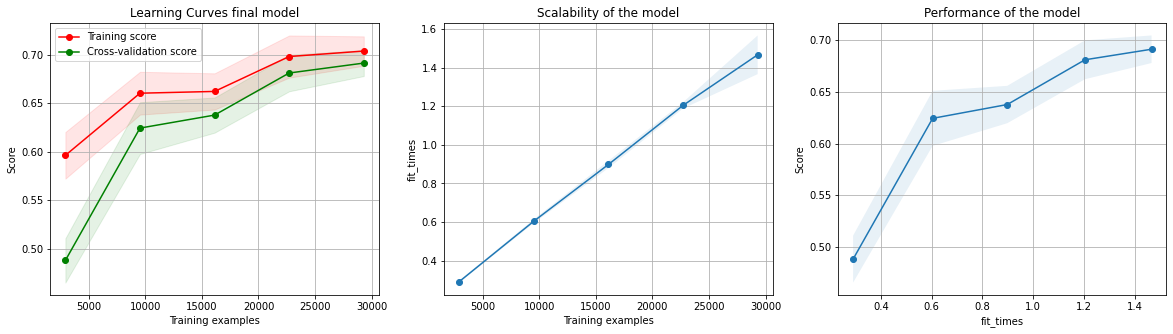

In [ ]:
title = "Learning Curves final model"
plot_learning_curve(final_model_pipe, title, X_train_over, y_train_over, cv=5, n_jobs=-1, score="recall")
plt.show()

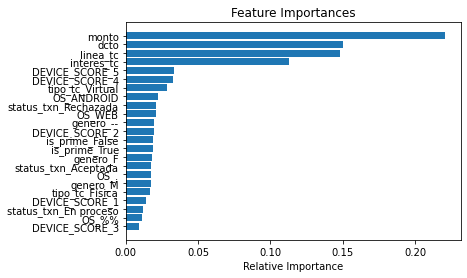

In [ ]:
importances = final_model_pipe["classifier"].feature_importances_
indices = np.argsort(importances)
features_ = columnas_totales
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features_[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
import shap

In [ ]:
data_for_prediction = final_model_pipe['features'].transform(X_test_over)
print(X_test_over.shape)
print(data_for_prediction.shape)

(15699, 11)
(15699, 23)


In [ ]:
explainer = shap.TreeExplainer(final_model_pipe["classifier"])

In [ ]:
shap_values = explainer.shap_values(data_for_prediction[0])
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], columnas_totales)

In [ ]:
shap_values = explainer.shap_values(data_for_prediction[1])
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], columnas_totales)

In [ ]:
shap_values = explainer.shap_values(data_for_prediction[2])
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], columnas_totales)

In [ ]:
shap_values = explainer.shap_values(data_for_prediction[3])
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], columnas_totales)

In [ ]:
shap_values = explainer.shap_values(data_for_prediction[4])
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], columnas_totales)

# shap.force_plot(explainer.expected_value[0], shap_values[0], columnas_totales,show=False, matplotlib=True).savefig('/gdrive/My Drive/Colab Notebooks/RAPPI/image.png')


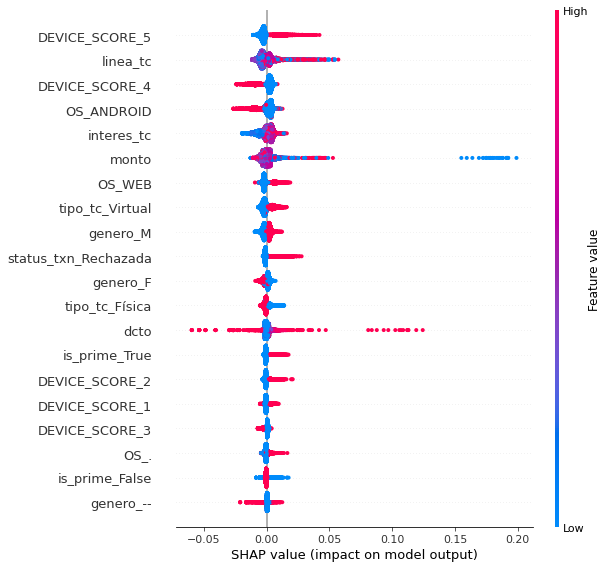

In [ ]:
shap.initjs()
data_points = 15000
shap_values = explainer.shap_values(data_for_prediction[:data_points])
shap.summary_plot(shap_values[0], data_for_prediction[:data_points], columnas_totales)

In [ ]:
X_test_over.head()

,genero,monto,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,OS,DEVICE_SCORE
12789,F,254.773269,Física,70000,46,Aceptada,True,0.000000,2.547733,.,5
1112,F,12.073666,Física,64000,58,Aceptada,False,1.207367,0.108663,ANDROID,3
13740,M,774.872339,Virtual,36000,49,En proceso,False,77.487234,13.947702,ANDROID,3
1496,M,323.106675,Física,80000,56,En proceso,False,32.310667,2.907960,.,2
15347,F,758.992611,Virtual,60000,36,Aceptada,False,151.798522,12.143882,.,5


In [ ]:
pd.DataFrame(shap_values[0][:5], columns=columnas_totales)

,monto,linea_tc,interes_tc,dcto,genero_--,genero_F,genero_M,tipo_tc_Física,tipo_tc_Virtual,status_txn_Aceptada,status_txn_En proceso,status_txn_Rechazada,is_prime_False,is_prime_True,OS_%%,OS_.,OS_ANDROID,OS_WEB,DEVICE_SCORE_1,DEVICE_SCORE_2,DEVICE_SCORE_3,DEVICE_SCORE_4,DEVICE_SCORE_5
0,-0.003537,0.001769,0.002676,-0.000918,0.000527,-0.001784,-0.002964,-0.001129,-0.002657,-0.001289,-0.000012,-0.001037,0.003060,0.003276,-0.000504,-0.002302,0.000385,-0.001465,-0.001030,-0.000327,0.001027,0.000349,0.004985
1,0.015249,0.001992,0.003962,0.001525,0.000416,-0.001794,-0.003568,-0.001264,-0.002430,-0.001002,0.000256,-0.001195,-0.001323,-0.000482,0.000095,-0.000194,-0.000517,-0.002000,-0.000240,-0.000667,-0.004535,0.000588,-0.002001
2,-0.002754,-0.002052,0.004539,0.007520,0.000319,0.001984,0.001415,0.004832,0.009376,0.001143,-0.000530,-0.000957,-0.000493,-0.001069,0.000191,-0.001541,-0.006018,-0.002116,-0.000486,-0.000175,-0.001383,0.004799,-0.006590
3,-0.003238,0.000526,0.001709,0.001144,0.000539,0.001004,0.002264,-0.001552,-0.002344,0.001250,-0.000095,-0.000939,-0.000564,-0.000768,0.000035,0.001192,0.003545,-0.002335,-0.000665,0.002739,0.000942,0.001706,-0.003872
4,0.003584,-0.002476,-0.005922,0.027647,0.001691,-0.001145,-0.007548,0.002924,0.009233,0.000018,-0.000011,-0.001026,-0.000529,-0.001382,0.000431,0.002468,0.002222,-0.001892,-0.000188,-0.000756,0.000277,0.004172,0.031029


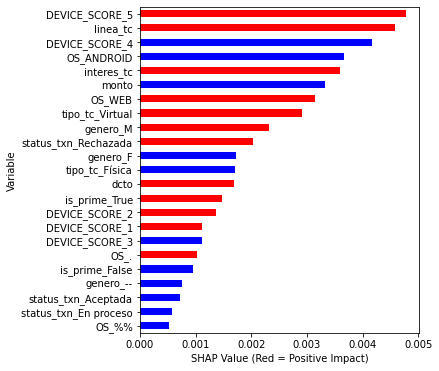

In [ ]:
ABS_SHAP(shap_values[0], pd.DataFrame(data_for_prediction[:data_points], columns=columnas_totales)) 

In [ ]:
'''
Valores promedio de las columnas contra los cuales los valores SHAP de la tabla de arriba se comparan
'''
X_test_over.mean()

monto             495.343784
linea_tc        62370.150965
interes_tc         48.128989
is_prime            0.130136
dcto               16.972390
cashback            6.200209
DEVICE_SCORE        3.004968
dtype: float64

In [ ]:
'''
Valores promedio de las columnas contra los cuales los valores SHAP de la tabla de arriba se comparan
'''
y_test_over.mean()

fraude    0.499968
dtype: float64

In [ ]:
'''
Valores promedio de las columnas contra los cuales los valores SHAP de la tabla de arriba se comparan
'''
pd.DataFrame(data_for_prediction, columns=columnas_totales).mean()

monto                   -0.009491
linea_tc                -0.004603
interes_tc              -0.001945
dcto                    -0.025643
genero_--                0.102427
genero_F                 0.408752
genero_M                 0.488821
tipo_tc_Física           0.708644
tipo_tc_Virtual          0.291356
status_txn_Aceptada      0.696350
status_txn_En proceso    0.202306
status_txn_Rechazada     0.101344
is_prime_False           0.869864
is_prime_True            0.130136
OS_%%                    0.260972
OS_.                     0.240843
OS_ANDROID               0.259443
OS_WEB                   0.238741
DEVICE_SCORE_1           0.199631
DEVICE_SCORE_2           0.191605
DEVICE_SCORE_3           0.202561
DEVICE_SCORE_4           0.216574
DEVICE_SCORE_5           0.189630
dtype: float64